In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
##Load Data

df=pd.read_csv(r"/content/drive/MyDrive/EDA files/supermarket_sales - Sheet1.csv")

# **Business Objective**

To analyze supermarket sales data to identify top-buying customers, best and least selling products and categories, branch-wise and gender-wise performance, and time-based sales trends (day, month, weekday, year). This analysis will help understand customer behavior, improve sales strategies, optimize inventory, and support data-driven business decisions.

# **Data Cleaning**

In [ ]:
## Handling missing value

df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
##Handling Duplicate value

df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
##incorrect datatype

df['Date']=pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


In [ ]:
##Checking Outliers

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,2019.0,1.993000,15.256000,307.58738
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.0,0.835254,8.693563,234.17651
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,2019.0,1.000000,1.000000,10.17000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,2019.0,1.000000,8.000000,118.49750
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2019.0,2.000000,15.000000,241.76000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,2019.0,3.000000,23.000000,448.90500
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,2019.0,3.000000,31.000000,993.00000


In [ ]:
df['Date'].

np.int64(1000)

# **Data understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Weekday,hour,revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,1,5,Saturday,13,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,3,8,Friday,10,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019,3,3,Sunday,13,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019,1,27,Sunday,20,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019,2,8,Friday,10,604.17
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,...,597.73,4.761905,29.8865,4.1,2019,3,25,Monday,18,597.73
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,...,413.04,4.761905,20.6520,5.8,2019,2,25,Monday,14,413.04
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,...,735.60,4.761905,36.7800,8.0,2019,2,24,Sunday,11,735.60
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,...,72.52,4.761905,3.6260,7.2,2019,1,10,Thursday,17,72.52
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,...,164.52,4.761905,8.2260,5.9,2019,2,20,Wednesday,13,164.52


In [ ]:
df.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,2019-01-24,18:10,Ewallet,766.00,4.761905,38.3000,6.0
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
df.shape

(1000, 17)

# **Feature Engineering**

In [ ]:
##Split the date into day, Month , Year and weekday wise

df['Date']=pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Weekday']=df['Date'].dt.day_name()
df['hour']=df['Time'].str.split(':').str[0]
df['revenue']= df['Unit price']*df['Quantity']

# **Checking Outlier by using Box plot**

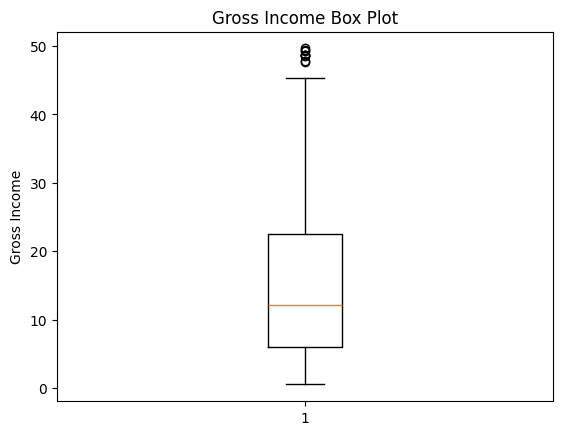

In [ ]:
plt.boxplot(df['gross income'])
plt.ylabel('Gross Income')
plt.title('Gross Income Box Plot')
plt.show()

# **Category Analysis**

Text(0.5, 1.0, 'Top 10 Product Lines')

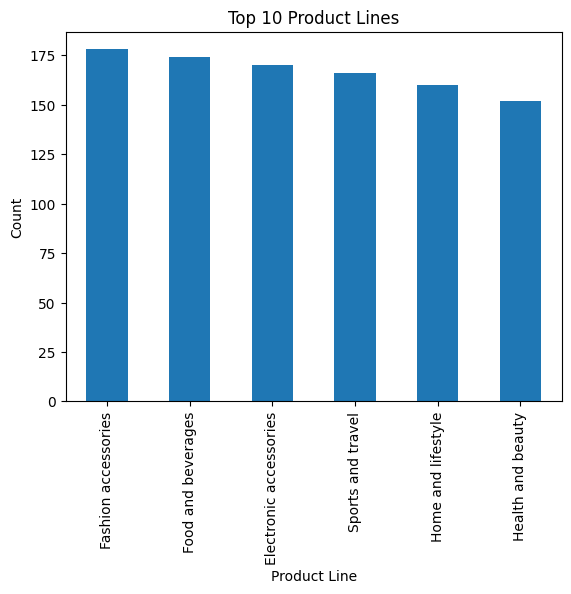

In [ ]:
## Top 10 Product line

df['Product line'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Top 10 Selling product line')

# **Customer Type Analysis**

Text(0.5, 1.0, 'Customer Type Analysis')

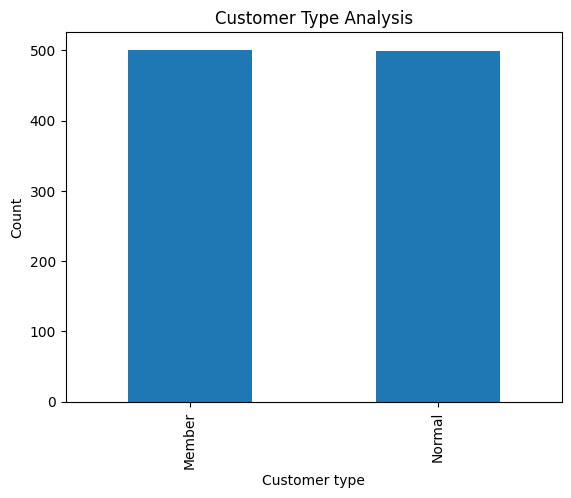

In [ ]:
df['Customer type'].value_counts().plot(kind='bar')
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.title('Customer Type Analysis')

# **Customer Gender Type Analysis**

Text(0.5, 1.0, 'Gender Split up analysis')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


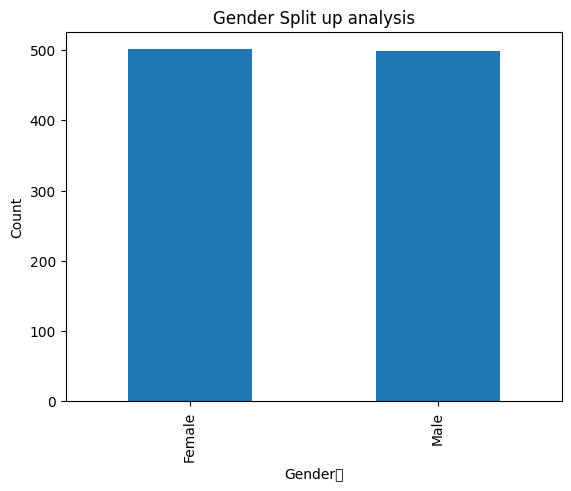

In [ ]:
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender	')
plt.ylabel('Count')
plt.title('Gender Split up analysis')

# **Revenue comparision of branch of supermarket**

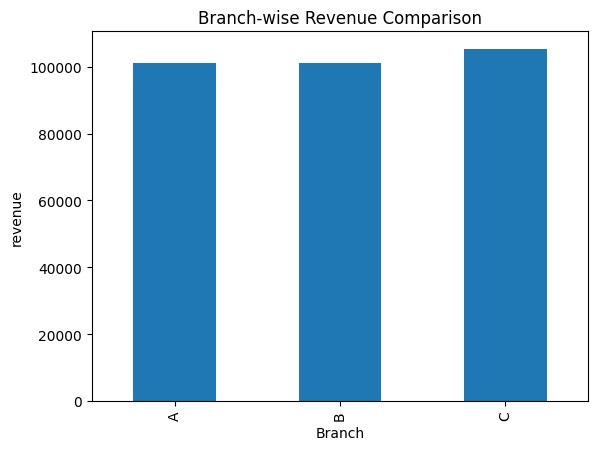

In [ ]:
branch_revenue = df.groupby('Branch')['revenue'].sum()
branch_revenue.plot(kind='bar')
plt.title('Branch-wise Revenue Comparison')
plt.xlabel('Branch')
plt.ylabel('revenue')
plt.show()

# **City - wise Analysis**

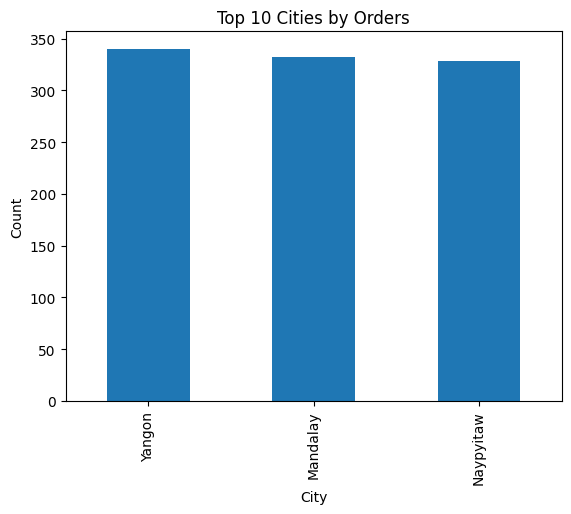

In [ ]:
df['City'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cities by Orders")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

# **Top Selling Product by Revenue**

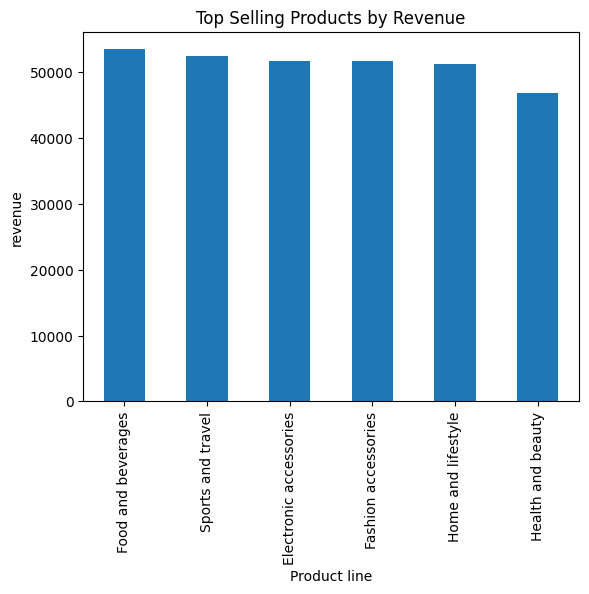

In [ ]:
top_selling_products = df.groupby('Product line')['revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar')
plt.title('Top Selling Products by Revenue')
plt.xlabel('Product line')
plt.ylabel('revenue')
plt.show()

# **Least Selling Product by Revenue**

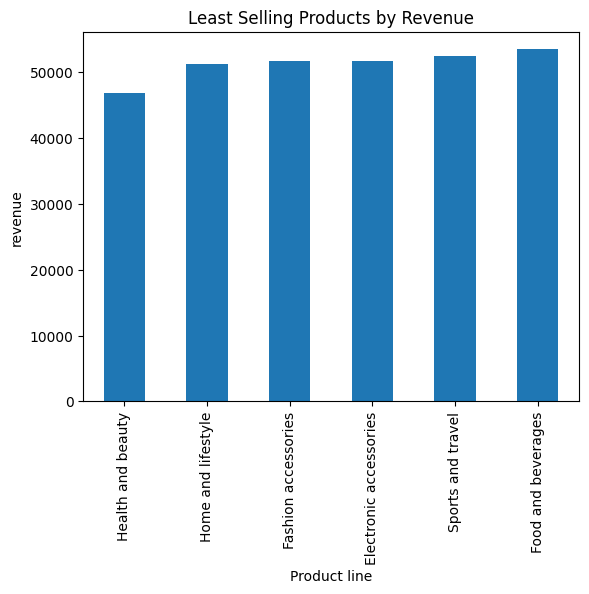

In [ ]:
least_selling_products = df.groupby('Product line')['revenue'].sum().sort_values().head(10)
least_selling_products.plot(kind='bar')
plt.title('Least Selling Products by Revenue')
plt.xlabel('Product line')
plt.ylabel('revenue')
plt.show()

# **Top Selling Product by Quantity**

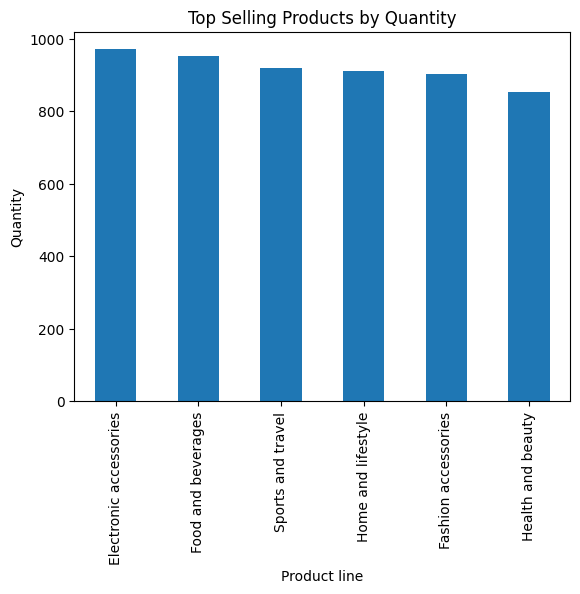

In [ ]:
top_selling_products_quantity = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).head(10)
top_selling_products_quantity.plot(kind='bar')
plt.title('Top Selling Products by Quantity')
plt.xlabel('Product line')
plt.ylabel('Quantity')
plt.show()

# **Least Selling Product by Quantity**

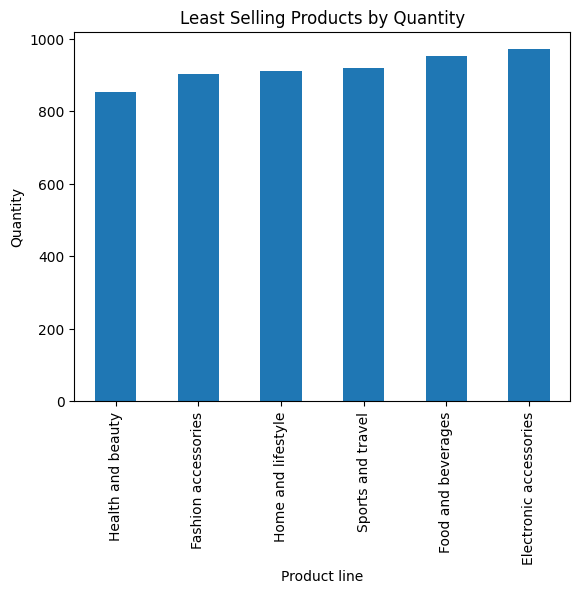

In [ ]:
least_selling_products_quantity = df.groupby('Product line')['Quantity'].sum().sort_values().head(10)
least_selling_products_quantity.plot(kind='bar')
plt.title('Least Selling Products by Quantity')
plt.xlabel('Product line')
plt.ylabel('Quantity')
plt.show()

# **Month wise sales Analysis**

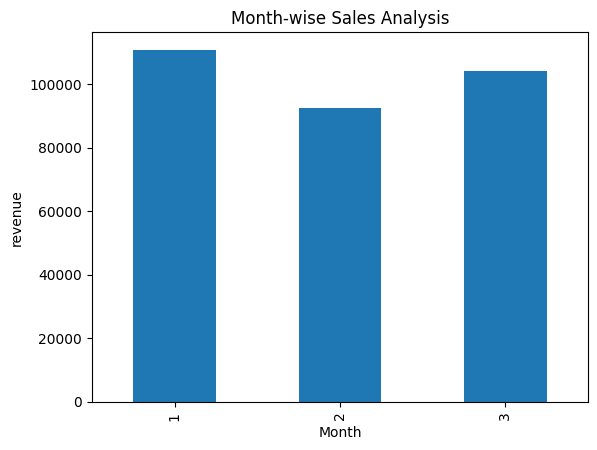

In [ ]:
monthly = df.groupby('Month')['revenue'].sum()
monthly.plot(kind='bar')
plt.title('Month-wise Sales Analysis')
plt.xlabel('Month')
plt.ylabel('revenue')
plt.show()

# **Day wise sales Analysis**

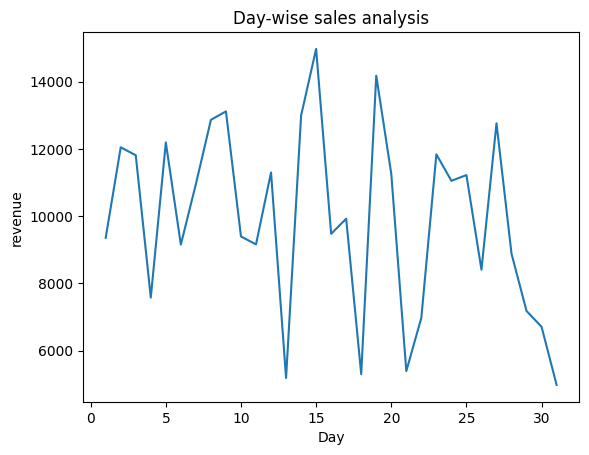

In [ ]:
daily = df.groupby('Day')['revenue'].sum()

daily.plot(kind= 'line')
plt.title('Day-wise sales analysis')
plt.xlabel('Day')
plt.ylabel('revenue')
plt.show()


# **Weekday wise sales Analysis**

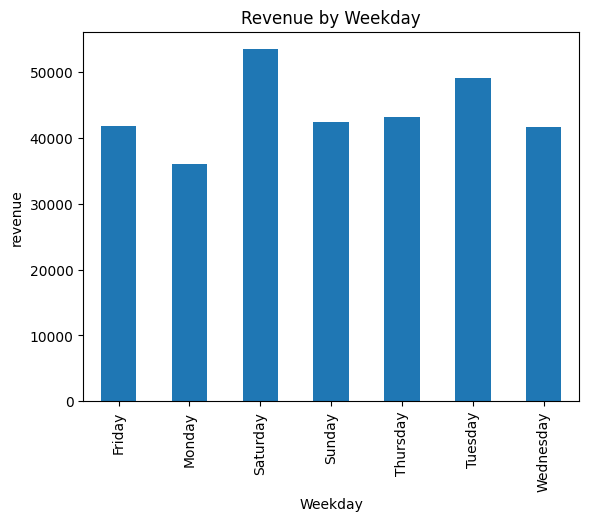

In [ ]:
weekday = df.groupby('Weekday')['revenue'].sum()

weekday.plot(kind='bar')
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("revenue")
plt.show()

# **Revenue vs Quantity Comparison**

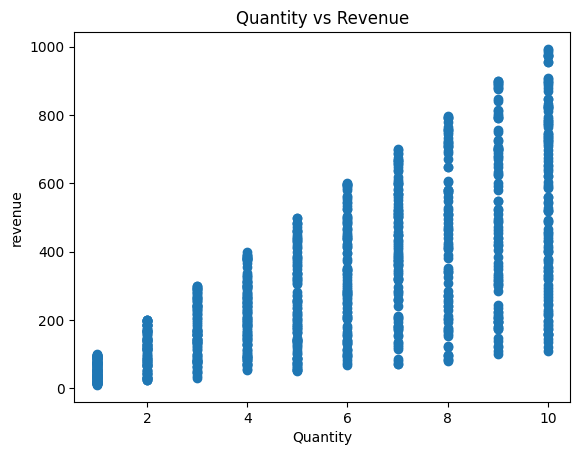

In [ ]:
plt.scatter(df['Quantity'], df['revenue'])
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity')
plt.ylabel('revenue')
plt.show()

# **Payment Method Analysis**

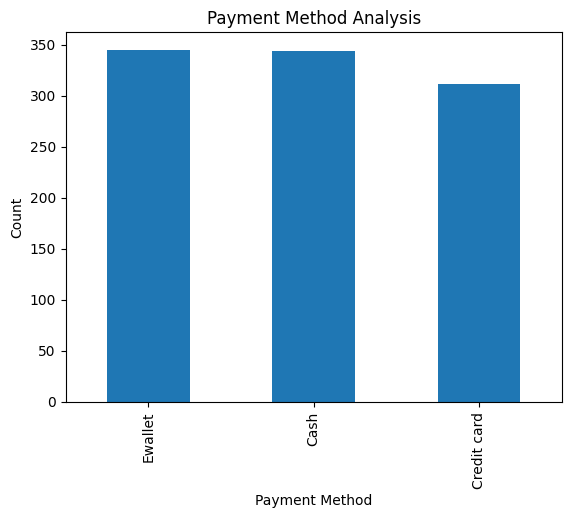

In [ ]:
payment_method = df['Payment'].value_counts()
payment_method.plot(kind='bar')
plt.title('Payment Method Analysis')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()
#